In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [24]:
np.random.seed(1)
# reset everything to rerun in jupyter
tf.reset_default_graph()

In [25]:
learning_rate = 0.1
training_epochs = 1000
logs_path = "/tmp/linear/1"

In [26]:
X = np.array([1,2,3])
y = np.array([1,2,3])

m = X.shape[0]

In [27]:
with tf.name_scope('input'):
    train_X = tf.placeholder(tf.float32)
    train_y = tf.placeholder(tf.float32)

In [28]:
# Model parameters
with tf.name_scope("weights"):
    W = tf.Variable(np.random.uniform(), name="weight")

# Bias
with tf.name_scope("biases"):
    b = tf.Variable(np.random.uniform(), name="bias")

In [29]:
# Construct a linear model
with tf.name_scope("model"):
    y_hat = tf.add(tf.multiply(train_X, W), b)

In [30]:
# Calculating cost function
with tf.name_scope('cross_entropy'):
    cross_entropy = (1 / (2 * m)) * tf.reduce_sum(tf.pow((y_hat - train_y), 2))

In [31]:
# Gradient decent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [32]:
# create a summary for our cost and accuracy
tf.summary.scalar("cost", cross_entropy)

# merge all summaries into a single "operation" which we can execute in a session 
summary_op = tf.summary.merge_all()

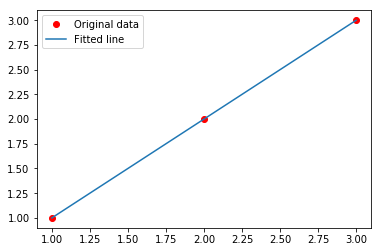

In [33]:
with tf.Session() as session:
    # variables need to be initialized before we can use them
    session.run(tf.global_variables_initializer())
    
    # create log writer object
    writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    
    for epoch in np.arange(training_epochs):
        for (Xl, yl) in zip(X, y): # zip basically sending data one by one
            _, summary = session.run([optimizer, summary_op], feed_dict={train_X: Xl, train_y: yl})
            
            # write log
            writer.add_summary(summary, epoch)
    
    #Graphic display
    plt.plot(X, y, 'ro', label='Original data')
    plt.plot(X, session.run(W) * X + session.run(b), label='Fitted line')
    plt.legend()
    plt.show()